# Overview

This week we'll talk about advanced network measures (beyond the degree distribution), and communities.

* Properties of the full philosopher network, including the importance of age in philosophy
* Properties of the branches of philosophy
* Are the branches communities?
* Community detection in the full philosopher network

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into section 9.4 in the exercises below. We will also talk a little bit about degree correlations - you can read about those in Chapter 7\.
> 

We will use the philosopher age more below.

## Part A: The structure of the Philosopher network

> **_Video lecture_**: Network measures. There's an updated video below, and if you can't get enough, you can watch the original version from 2015 [here](https://youtu.be/0uAYpOqVHCU/).


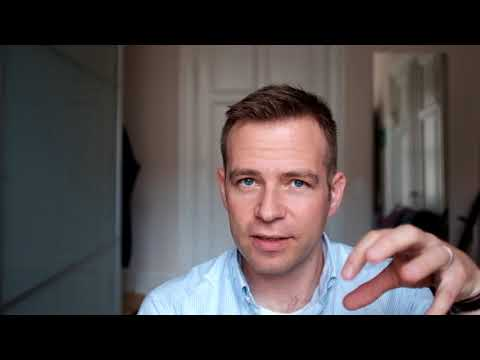

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("IOWXZFOyk9Y",width=800, height=450)



We begin with a preliminary analysis of the network 

> _Exercise_: Begin to analyze the philosopher network.
> 
> * Why do you think I want you guys to use a directed graph? Could have we used an undirected graph instead?
> * What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?
> * List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?
> * Plot the distribution of in-degrees and out-degrees, binned using `numpy.histogram`. What is the most common degree?
> * Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.
> * Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?
> * Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two.
>

> _Exercise_: Going in depth with the structure of the the philosopher network 
> 
> Above, we found the most connected philosophers (using degree centrality). Now let's dig in and try to understand more about the philosopher network using more advanced network features. If your network has more than one component, just work on the _giant connected component_ (GCC) in the exercises below (in a directed graph use the [_weakly_ connected component](https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.component.html)).
> 
> * Not all of the measures we'll be considering below are defined for directed graphs, thus begin by creating an [undirected version](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.DiGraph.to_undirected.html) of the philosopher graph, that we can use whenever needed. Only use the undirected graph when explicitly stated in the exercise.
> * Find the 5 most central philosophers according to [betweenness centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html). What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?
> * Find the 5 most central philosophers according to [eigenvector centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html). Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). How is eigenvector centrality difference from degree centrality? Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?
> * Is the _undirected version_ of the graph [assortative with respect do degree](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html#networkx.algorithms.assortativity.degree_assortativity_coefficient)? (e.g. do high-degree philosophers tend to link to other high-degree philosophers, and low-degree philosophers to other low-degree philosophers?). Provide an interpretation of your answer?
> 

> _Exercises_: Age and structure in the philosopher network
> 
> Age of the philosophers plays a large role. Socrates/Plato and Aristotle are massive influences on philosophy in millennia subsequent to their birth. Now, let us explore how the birth-year of the philosophers plays a role in shaping the network. We've created a file (`.json` format) which provides the birth year for most of the philosophers. Get it [**here**](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/philosopher_birth_year.json). In the following, you may use that to get the birth-year for the philosopher. _Note_: It's possible that the list of names in the list of birth-years is not identical to the set of nodes in your network; thus, for the exercises including age, simply work on the [subgraph](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.Graph.subgraph.html) of nodes for which you have age-info.
> 
> * Create a histogram of the number of philosophers born in every century, starting 500 BC. Describe the plot. Does philosophy seem to have developed at a steady pace - or in a more bursty manner? Are we living in a golden age of philosophy right now? (Use the data & common sense to present an argument for your answer).
> * Is the _undirected version_ of the graph [assortative with respect to age](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient)? Once again, please provide a discussion of your findings.
>   * **Note 1**: The NetworkX assortativity coefficient works on [categorical data](https://en.wikipedia.org/wiki/Categorical_variable), thus I recommend you represent each philosopher's age by their **century of birth** rather than birth year.
>   * **Note 2**: Alternatively you can write your own algorithm to calculate age-assortativity, use the strategy behind degree correlations - see [this paper's](https://arxiv.org/abs/cond-mat/0209450) Equation (21).
> * A reasonable hypothesis is that old philosophers are more famous. Create a scatter-plot of age versus in-degree. Do you see a correlation between the two? Justify your answer (for example by calculating the correlation coefficient.)
> 

## Part B: The branches of philosophy. Are they communities?

Before we begin coding, let's learn about communities. If you want to learn more details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the lecture should be enough to get you started. For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: Communities in networks. 

You can watch the 2015 video [here](https://youtu.be/06GL_KGHdbE/).

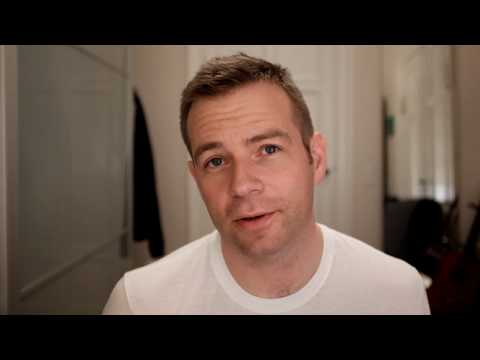

In [3]:
YouTubeVideo("FSRoqXw28RI",width=800, height=450)

> _Exercises_: We will use the concept of modularity to explore how _community-like_ the six branches of philosophy are.
> 
> * Explain the concept of modularity in your own words.
> * Now we will calculate the modularity of the branches reported by the Wikipedia editors. But we need to do a bit of work to make this happen.
> * Firstly, modularity does not work when the communities are overlapping. Thus, we need to do something about the philosophers that are part of multiple branches. We will handle it by creating a set of _six new branches_, where we take all of the philosophers that belong to more than one branch and assign them to the branch that they have the most connections to. The procedure is the following:
>   * Start with creating six new branches (e.g. represented as [`set`s](https://docs.python.org/2/library/sets.html) in Python) containing all of the philosopher that can be unambiguously assigned to a branch.
>   * Then, take the list of all nodes that are part of more than one branch. For each member _i_ of this list, find those of its neighbours that you just unambigously assigned to each branch. 
>   * Add _i_ to to the branch that it has most such connections to.
> * Now that we have a new set of non-overlapping branches, we can calculate the modularity, described in the _Network Science_ book, section 9.4). Use **equation 9.12** in the book to calculate the modularity _M_ of the branches-partitioning. 
> * Comment on the value of _M_. Are the branches good communities? (We will explore this question in depth below.)
> 

## Part C: Community detection in the full philosopher network.

> _Exercises_: As a final exercise, we will now run community detection on the full philosopher network. 
> 
> * Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities in the full philosopher network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the branches as communities? What does this comparison reveal about the branches?
    >   * \[**Note**: This implementation is now available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain)\]. 
    >   * You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.
> * Compare the communities found by your algorithm with the branches of philosophy by creating a matrix **_D_** with dimension (_B_ times _C_), where _B_ is the number of branches and _C_ is the number of communities. We set entry _D_(_i_,_j_) to be the number of nodes that branch _i_ has in common with community _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the labeled branches of philosophy.
> 

## Part D: Properties of individual branches of philosophy

**_This part is optional!_** But I recommend that you work through it anyway - it is probably the exercise that will teach you the most about philosophy.

> _Exercises_: Understanding the branches of philosophy. You already know a lot about network analysis, so in this assignment I'm providing fewer details on what I want you to do: Figuring out what things to calculate in order to provide an awesome quantitative answer to my questions is part of the assignment. That way you can show that you're able to use the skills you've acquired up till now.
> 
> * Perform an centrality analysis of each of the six branches of philosophy knowing what you've just learned about _centrality_ in complex networks. Use your analysis to reveal the identity of the most important figures in each branch of philosophy. 
> * Each of the six branches has its own unique history. Use histograms (and/or whatever else you can think of) to reveal the temporal differences and similarities between the six branches of philosophy.
>